# Home Credit Default Risk Analysis
##### Team 7a Jingjing Lu, Alice Jiang, Chuning Chen, Xuanqi Liang, Yantao Wang

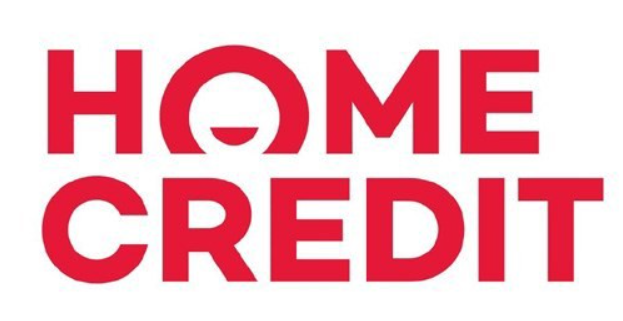

## Agenda

#### I. Introduction
    1. Business Problem
    2. Data Source
#### II. Data Overview 
    Dataset 1: application
    Dataset 2: previous_application       
    
#### III. Exploratory Data Analysis (EDA)
   ##### a. Dataset 1 EDA & Analysis Tasks
        1. Distribution of Target (Payment Difficulties)
        2. Which type of Loan is more popular
        3. Which age has the highest repayment difficulty
        4. How education type affect income and repayment status
        5. How family status affect repayment difficulties
        6. When applicants usually start to apply Home Credit, in terms of days employed
        7. Distribution of Occupation and Organization Types
    
   ##### b. Dataset 2 EDA & Analysis Tasks    
        1. Contract product type of previous application
        2. Contract was approved or not in previous application
        3. Reasons why the previous application was rejected
        4. What was the previous application for
        5. Payment method that client choose to pay for the previous application
    
#### IV. Data Preparation
        a. Preprocessing
        b. Process Correlated Features
        c. Split the data into train and test with a 70-30 split
        d. Fit the Model
   
   
#### V. Challenges
#### VI. Conclusion

## I. Introduction
Home Credit is a consumer finance provider which focus on lending primarily to people with little or no credit history. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data to predict their clients' repayment abilities.


#### 1. Business Problem: 

The goal of this project is to use quantitative analysis and machine learning methods to make predictions for potential target customers, so that sanctioning loan only for the applicants who are likely to repay the loan.

#### 2. Data Source:

The dataset was provided by Home Credit, and downloaded from Kaggle:
https://www.kaggle.com/c/home-credit-default-risk/overview

In this project, we are using two datasets -- `application_train` dataset and `previous_application` dataset. The `application_train` has personal information about current clients. We would like to use this dataset to examine which features would affect a client's ability of repayment. Besides looking at the current application dataset, we would like to the previous application information in order to dive into how previous application round processes. The `previous_application` dataset contains background information features that are not presented in the `application_train` dataset, thus used with supplementary needs. We will merge these two datasets in later this project and build a predictive model on the two. 


## II. Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
sns.set_style("whitegrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

#### Dataset 1: application

In [3]:
df = pd.read_csv('application_train.csv')

In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
df.shape

(307511, 122)

In [98]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 307511 rows and 122 columns.


**Observations in ‘application_train.csv’ file :**
* This dataset consists of 307511 rows and 122 columns.
* The `application_train.csv` is saved as `df`. The dataset contains information about current loan application at Home Credit. Every loan has its own row and is identified by the feature 'SK_ID_CURR'. 
* Each row has unique id 'SK_ID_CURR' and the output label is in the 'TARGET' column.
* 'TARGET' column has 0 and 1. '1' indicates that client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, '0' means all other cases.
* Based on the dataset structure, we need to predict if they are capable to repay the loan or not. Since we have two classes in the target label, we will pose this problem as a Binary classification problem.


####  Check for Missing data

In [7]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = round(((df.isnull().sum()/len(df)*100)).sort_values(ascending=False),2)
missing_df = pd.concat([count, percentage], axis=1, keys=['Missing Count','Percentage'])
missing_df.head(10)

,Missing Count,Percentage
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35


In [100]:
df.isnull().sum().sum()

9152465

There are a lot missing values in df need to handle. We will see how to handle it in later section. 

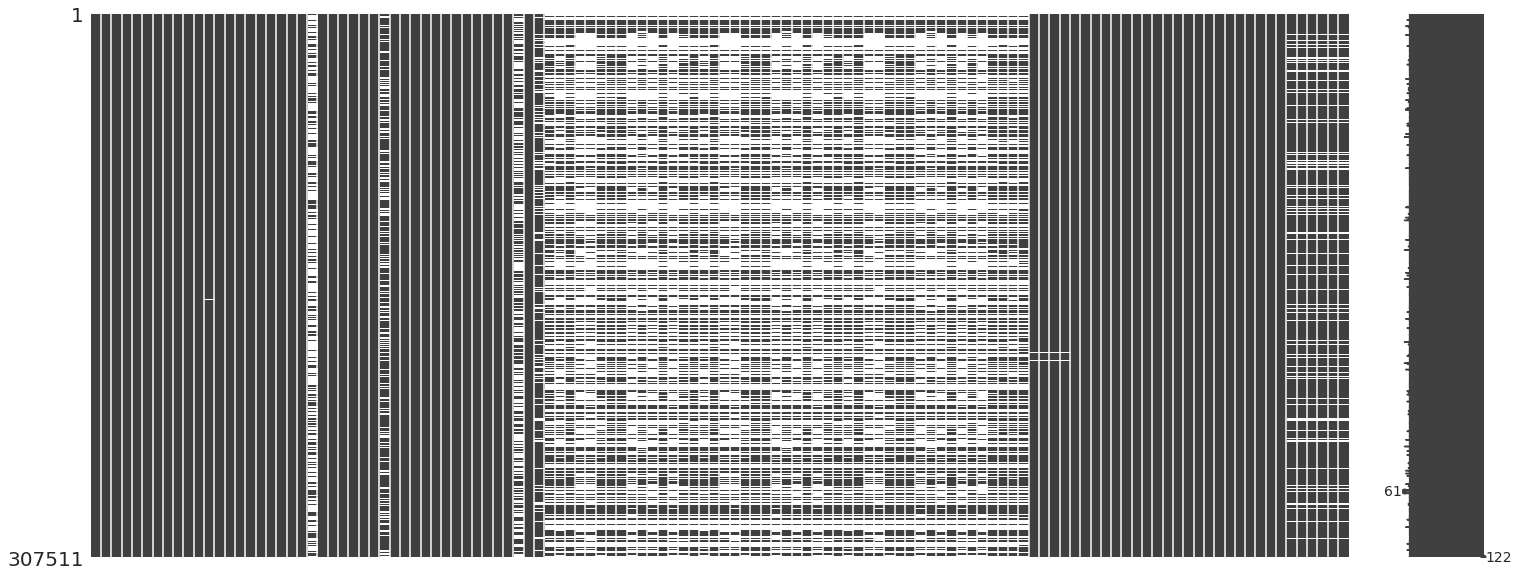

In [101]:
# visualize missing values
import missingno as msno
msno.matrix(df)
plt.show()

#### Dataset 2: previous_application

In [4]:
pa = pd.read_csv('previous_application.csv')

In [8]:
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pa[pa['SK_ID_PREV']]='1784265'

In [7]:
print('The dataset has {} rows and {} columns.'.format(pa.shape[0],pa.shape[1]))

The dataset has 1670214 rows and 37 columns.


In [10]:
pa.isnull().sum().sum()

11109336

In [ ]:
pa.info()

**Observations in ‘previous_application.csv’ file :**
* The `previous_application.csv` saved as `pa`. The dataset contains all previous applications for Home Credit loans of clients who have loans in our sample.
* Each previous application has one row and is identified by the feature 'SK_ID_PREV'


We will apply further exploratory data analysis for features listed in the following data dictionary:

<center>**Data Dictionary**</center>

| Feature     | Description                                                  |
|-------------|--------------------------------------------------------------|
| ``TARGET``  | 0: No repayment difficulties; 1: With repayment difficulties |
| ``NAME_CONTRACT_TYPE``   | Identification if loan is cash or revolving     |
| ``DAYS_BIRTH``     | Client's age in days at the time of application       |
| ``NAME_EDUCATION_TYPE``|Level of highest education the client achieved     |
| ``NAME_FAMILY_STATUS``    | Family status of the client                    |
| ``DAYS_EMPLOYED``| How many days before the application the person started current employment   |
| ``AMT_INCOME_TOTAL`` | Income of the client                                |
| ``OCCUPATION_TYPE``    | What kind of occupation does the client have      |
| ``ORGANIZATION_TYPE``  |Type of organization where client works         |
| ``COMMONAREA_AVG``  |Normalized information about building where the client lives |
| ``NAME_CONTRACT_STATUS``   | Contract status during the month     |
| ``CODE_REJECT_REASON``     | Why was the previous application rejected       |
| ``NAME_PORTFOLIO``| Was the previous application for CASH, POS, CAR, etc.    |
| ``NAME_PAYMENT_TYPE``   |Payment method that client chose to pay for the previous application |


## III. Exploratory Data Analysis (EDA)
### a. Dataset 1 EDA & Analysis Tasks  
#### 1. Distribution of Target (Payment Difficulties)

In [27]:
target = df['TARGET'].value_counts()
target.head()
target_df = pd.DataFrame({'labels': target.index,
                   'values': target.values})
target_df

,labels,values
0,0,282686
1,1,24825


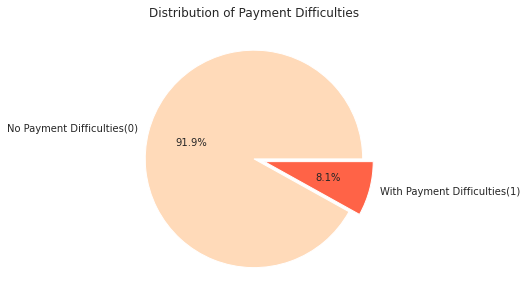

In [104]:
my_labels = ['No Payment Difficulties(0)','With Payment Difficulties(1)']
my_explode = (0, 0.1)
colors = ['PeachPuff','Tomato']
plot = plt.pie(target_df['values'],labels=my_labels,autopct='%1.1f%%',explode=my_explode,colors=colors)
plt.title('Distribution of Payment Difficulties')
plt.rcParams['figure.figsize']=(15,5)
plt.savefig('p-Distribution of Payment Difficulties.pdf') 

In our dataset, we have unbalanced target variable. Most clients (91.9%) do not have payment difficulties. In contrast, there are 8.1% clients having payment difficulties. 

#### 2. Which type of Loan is more popular

In [30]:
loan = df['NAME_CONTRACT_TYPE'].value_counts()
loan_df = pd.DataFrame({'labels': loan.index,
                   'values': loan.values})
loan_df

,labels,values
0,Cash loans,278232
1,Revolving loans,29279


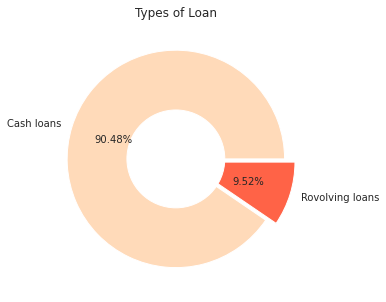

In [103]:
my_labels = ['Cash loans','Rovolving loans']
my_explode = (0, 0.1)
colors = ['PeachPuff','Tomato']
plot = plt.pie(loan_df['values'],labels=my_labels,autopct='%1.2f%%',explode=my_explode,colors=colors)
circle = plt.Circle(xy=(0,0),radius=0.45,facecolor='white')
plt.gca().add_artist(circle)
plt.title('Types of Loan')
plt.savefig('p-Types of Loan.pdf') 

Most of the loans (more than 90%) are cash loans taken by applicants

#### 3. Which age has the highest repayment difficulty

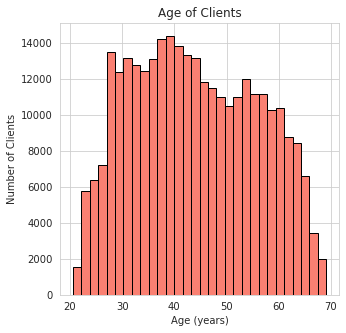

In [102]:
plt.hist(abs(df['DAYS_BIRTH'] / 365), edgecolor = 'k', bins = 30,color='Salmon')
plt.title('Age of Clients') 
plt.xlabel('Age (years)')
plt.ylabel('Number of Clients')
plt.rcParams['figure.figsize']=(5,5)
plt.savefig('p-Age of Clients.pdf') 

This histogram can not reflect too much besides no outlier in age column. We would like to explore more in kde plot to visulize the age effect on target.

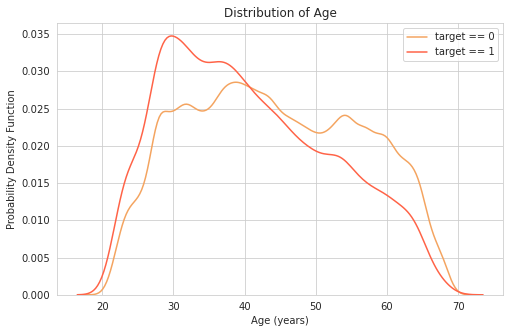

In [108]:
age_repaid = sns.kdeplot(abs(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH']/ 365), label = 'target == 0',color='SandyBrown')
age_unrepaid = sns.kdeplot(abs(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH']/ 365), label = 'target == 1',color='Tomato')

plt.xlabel('Age (years)') 
plt.ylabel('Probability Density Function')
plt.title('Distribution of Age')
plt.legend(loc="upper right")
plt.rcParams['figure.figsize']=(10,5)
plt.savefig('p-Distrobution of Age.pdf') 

Based on the plot above, we can conclude that the younger age clients, especially 30 years old, tend to have more repayment difficulties. When age is 40, clients have less pressure to repay on time.

#### 4. How education type affect income and repayment status

In [159]:
df.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg('sum').sort_values(ascending=False)

NAME_EDUCATION_TYPE
Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: TARGET, dtype: int64

The "secondary / secondary special" education level has the highest frequency of not repay on time. Moreover, the frequency is approximately 5 time more than the next category. 

In [160]:
df.pivot_table(values='AMT_INCOME_TOTAL',
               index=['NAME_EDUCATION_TYPE'], 
               columns='TARGET', 
               aggfunc='mean').sort_values(by=0,
                                           ascending=False)

TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,238472.049689,322500.000000
Higher education,209354.906346,196230.025069
Incomplete higher,182036.386124,176466.844610
Secondary / secondary special,154722.697425,159597.621159
Lower secondary,130211.115622,129005.395683


We ordered the results by descending order of average income for client group which has no repayment difficulty (target = 0). In the five different education levels, clients in "academic education" has the highest average income. The average of income is higher with higher education level. One interesting thing is that people got academic degree with average income of 322,500 dollars still have loan repayment difficulty. We will dive deeper in countplot.

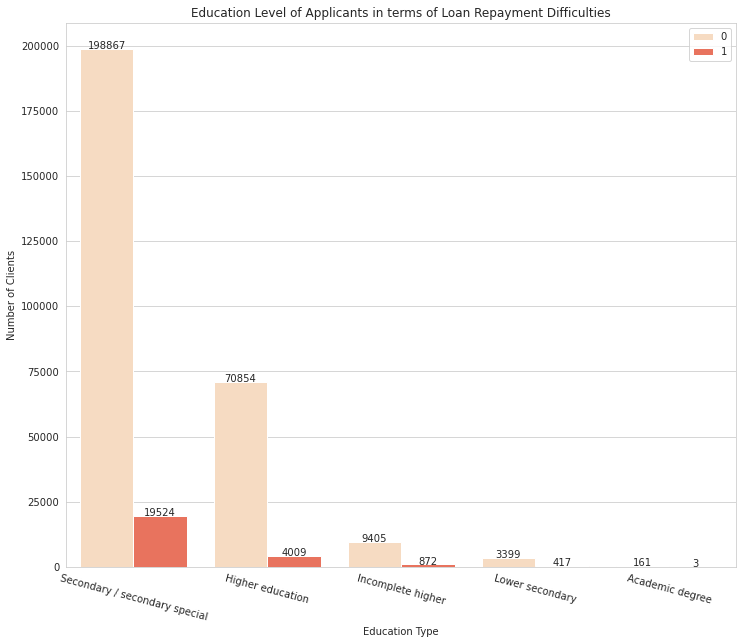

In [137]:
ax = sns.countplot(x='NAME_EDUCATION_TYPE',data=df,hue='TARGET',
                    order=df['NAME_EDUCATION_TYPE'].value_counts().index)

sns.set_palette(["PeachPuff","Tomato"])
plt.xticks(rotation=-15)
plt.legend(loc='upper right') 
plt.xlabel('Education Type')
plt.ylabel('Number of Clients')
plt.title('Education Level of Applicants in terms of Loan Repayment Difficulties')
plt.rcParams['figure.figsize']=(8,10)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.savefig('p-Education Level.pdf') 

Based on results from plot above, people with Academic Degree (college degree) are more likely to repay the loan (Out of 164, only 3 applicants are not able to repay). 

Clients who has secondary education (Grade 6 - 12) type is the group of people who use loan most frequently. Also, they tend to have more repayment difficulty.

#### 5. How family status affect repayment difficulties

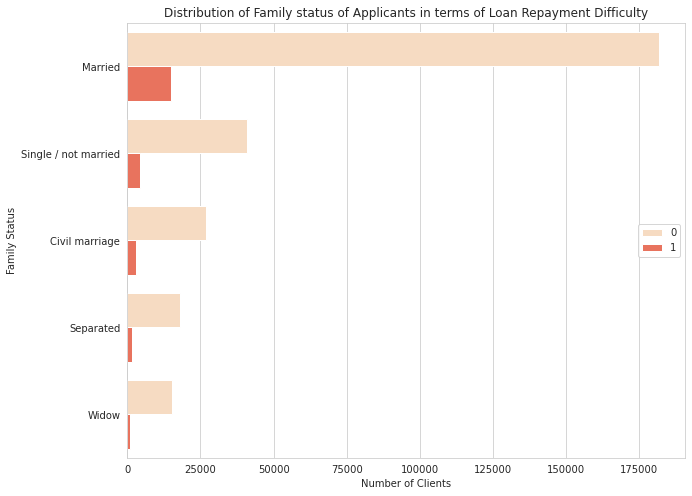

In [163]:
ax = sns.countplot(y='NAME_FAMILY_STATUS',data=df,hue='TARGET',order=df['NAME_FAMILY_STATUS'].value_counts().iloc[:5].index)
plt.title('Distribution of Family status of Applicants in terms of Loan Repayment Difficulty')
plt.legend(loc='center right') 
plt.ylabel('Family Status')
plt.xlabel('Number of Clients')
plt.rcParams['figure.figsize']=(8,10)
plt.savefig('p-Family status.pdf') 

In [54]:
fam = df.sort_index(ascending=False).groupby(['NAME_FAMILY_STATUS'])['TARGET'].agg([np.sum])
fam

,sum
NAME_FAMILY_STATUS,
Civil marriage,2961
Married,14850
Separated,1620
Single / not married,4457
Unknown,0
Widow,937


In [55]:
fam['Total'] = df['NAME_FAMILY_STATUS'].value_counts()
fam

,sum,Total
NAME_FAMILY_STATUS,,
Civil marriage,2961,29775
Married,14850,196432
Separated,1620,19770
Single / not married,4457,45444
Unknown,0,2
Widow,937,16088


In [56]:
fam['Percent (%)']=round(fam['sum']/fam['Total']*100,2)
fam.sort_values(by='Percent (%)',ascending=False)
fam

,sum,Total,Percent (%)
NAME_FAMILY_STATUS,,,
Civil marriage,2961,29775,9.94
Married,14850,196432,7.56
Separated,1620,19770,8.19
Single / not married,4457,45444,9.81
Unknown,0,2,0.00
Widow,937,16088,5.82


According to the plot, married status has highest frequency using Home Credit. Both civil marriage and single applicants tend to have more repayment difficulty. In contrast, widow are more likely repay on time. 


#### 6. When applicants usually start to apply Home Credit, in terms of days employed

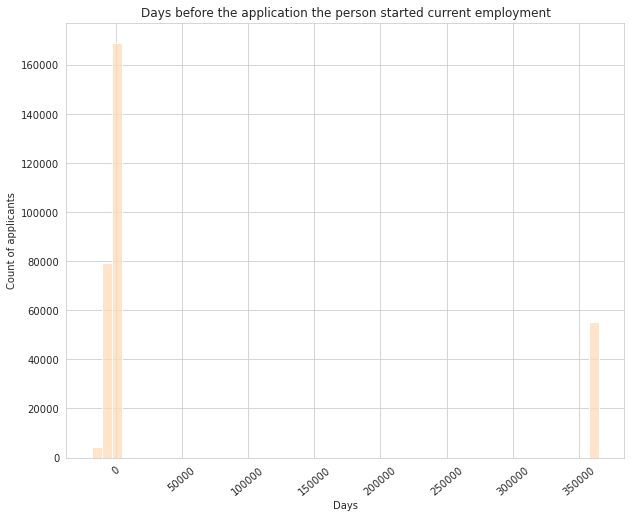

In [200]:
employment = sns.histplot(x='DAYS_EMPLOYED',data=df,bins=50)
plt.xlabel('Days')
plt.ylabel('Count of applicants')
plt.title('Days before the application the person started current employment')
plt.xticks(rotation=40)
plt.rcParams['figure.figsize']=(8,10)

plt.savefig('p-days.pdf') 

In [183]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

We can see that there is an outlier in the right side of the plot. It is strange to have 365243 days (1000 years) of employment. It seems like a typo. Hence, we need to handle this error. 

In [203]:
error = df[df['DAYS_EMPLOYED'] == 365243]
print('The number of errors are :', len(error))
(error['TARGET'].value_counts()/len(error))*100

The number of errors are : 55374


0    94.600354
1     5.399646
Name: TARGET, dtype: float64

The error occupies 5.4% of the the data. We will replace these values as na and exclude in the next step analysis. 

In [204]:
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [205]:
df['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

Double check the results. The max is not 365243 anymore.

In [206]:
df_copy=df.copy()
df_copy['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
df_copy['YEARS_EMPLOYED']=df_copy['DAYS_EMPLOYED']/365
df_copy['YEARS_EMPLOYED'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In order to keep the original data, we create a copy version of the current data frame. The visualization is based on the copied data frame. In order to interpret the result easily, we convert the "days" to "years".

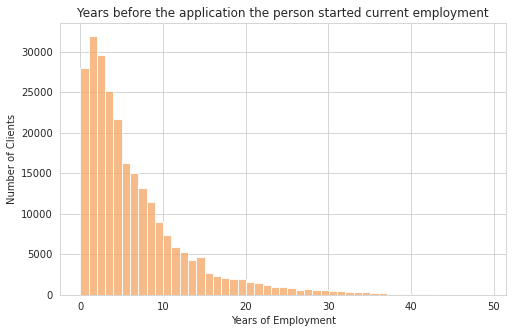

In [215]:
sns.histplot(x="YEARS_EMPLOYED",data=df_copy,bins=49,color='SandyBrown')
plt.xlabel('Years of Employment')
plt.ylabel('Number of Clients')
plt.title('Years before the application the person started current employment')
plt.rcParams['figure.figsize']=(10,5)

plt.savefig('p-yrs.pdf') 

According to the results from the plot above, we can conclude that applicants with less than 2 years of employment are more likely to start Home Credit application. 

#### 7. Distribution of Occupation and Organization Types

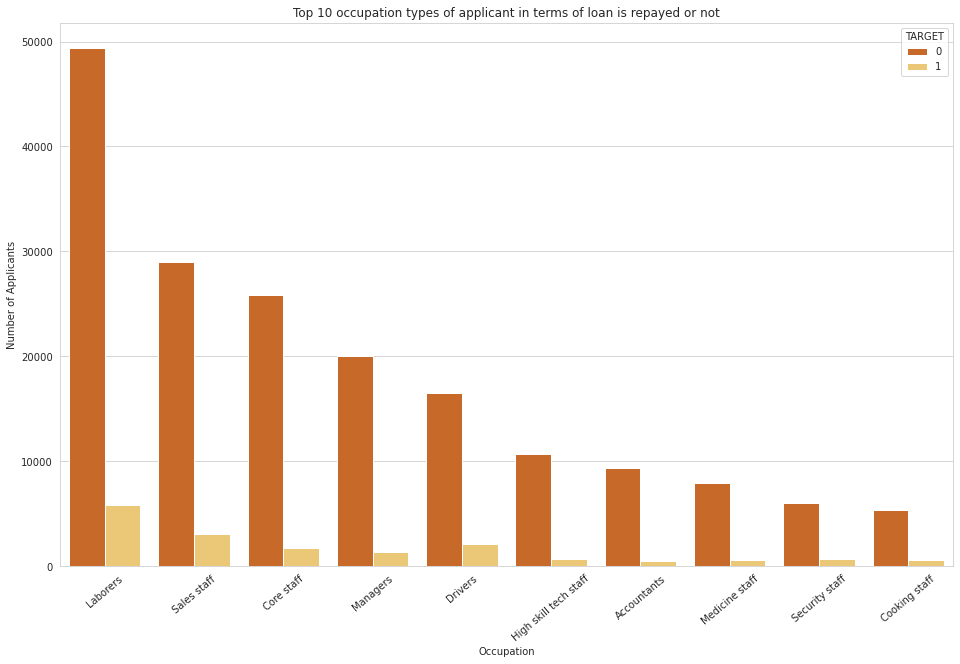

In [232]:
ax = sns.countplot(x='OCCUPATION_TYPE',data=df, palette='YlOrBr_r', hue='TARGET',order=df['OCCUPATION_TYPE'].value_counts().iloc[:10].index)
plt.xlabel('Occupation')
plt.ylabel('Number of Applicants')
plt.title('Top 10 occupation types of applicant in terms of loan is repayed or not')
plt.rcParams['figure.figsize']=(16,12)
plt.xticks(rotation=40)
plt.savefig('p-occupation.pdf') 

Top five occupations of the applicants are laborer, sales staff, core staff, manager and driver.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Business Entity Type 3'),
  Text(1, 0, 'XNA'),
  Text(2, 0, 'Self-employed'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Medicine'),
  Text(5, 0, 'Business Entity Type 2'),
  Text(6, 0, 'Government'),
  Text(7, 0, 'School'),
  Text(8, 0, 'Trade: type 7'),
  Text(9, 0, 'Kindergarten')])

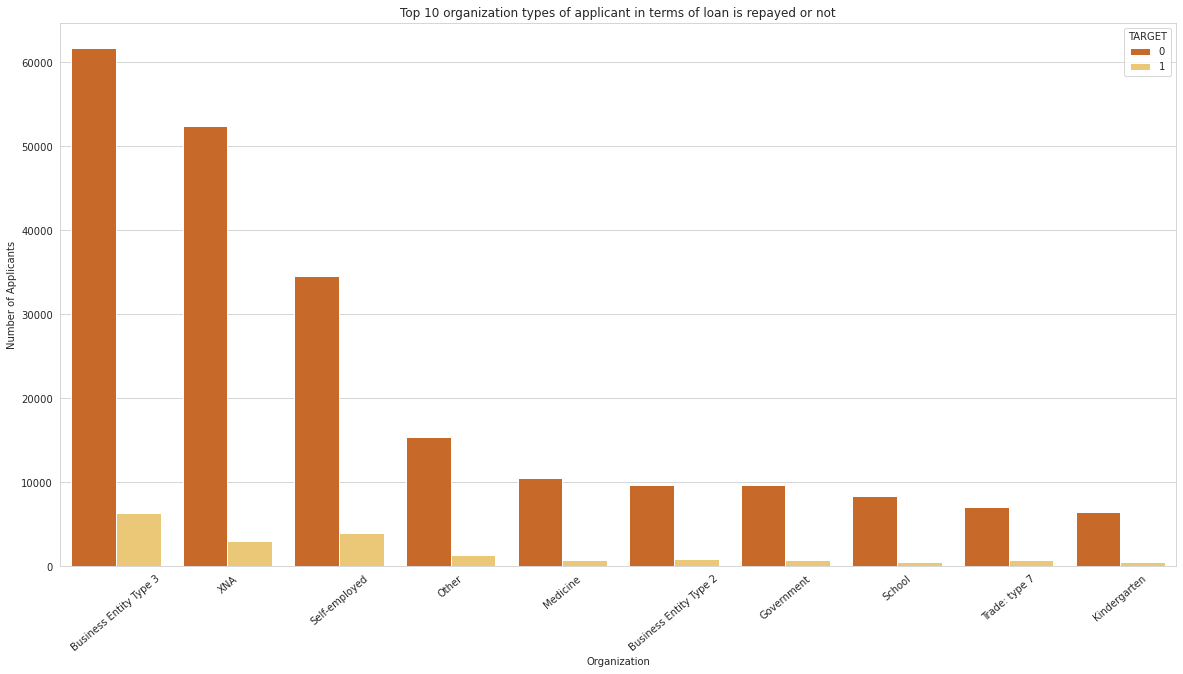

In [152]:
ax = sns.countplot(x='ORGANIZATION_TYPE',data=df, palette='YlOrBr_r', hue='TARGET',order=df['ORGANIZATION_TYPE'].value_counts().iloc[:10].index)
plt.xlabel('Organization')
plt.ylabel('Number of Applicants')
plt.title('Top 10 organization types of applicant in terms of loan is repayed or not')
plt.rcParams['figure.figsize']=(20,10)
plt.xticks(rotation=40)

### b. Dataset 2 EDA & Analysis Tasks  

We are trying to study the previous application dataset differently as supplement of the current application dataset on the aspects of contract type, rate at which applications get approved, reasons for rejection, etc. To see whether the client's information in the previous round impacted the next round of applications.

#### 1. Contract type of previous application

In [38]:
loan = pa['NAME_CONTRACT_TYPE'].value_counts()
loan_pa = pd.DataFrame({'label': loan.index,
                   'value': loan.values})
loan_pa

,label,value
0,Cash loans,747553
1,Consumer loans,729151
2,Revolving loans,193164
3,XNA,346


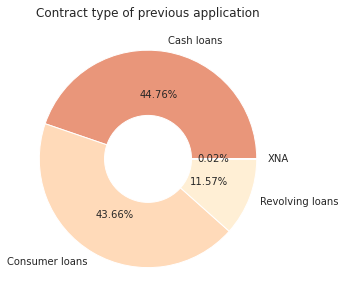

In [248]:
my_label = ['Cash loans','Consumer loans','Revolving loans','XNA']
color = ['DarkSalmon','PeachPuff','PapayaWhip','LemonChiffon']
plot = plt.pie(loan_pa['value'],labels=my_label,autopct='%1.2f%%',colors=color,data=pa)
circle = plt.Circle(xy=(0,0),radius=0.4,facecolor='white')
plt.gca().add_artist(circle)
plt.title('Contract type of previous application')
plt.rcParams['figure.figsize']=(10,5)

plt.savefig('p-contract_pre.pdf') 

* **Contract was approved or not in previous application :**
    * Cash loans : 44.76 % times
    * Consumer loans : 43.66 % times
    * Revoloving loans : 11.57 % times

In previous dataset, firstly we would like to know contract type of previous application. There are three types, which are cash loans, consumer loans and revolving loans. Cash loans and Consumer loans were two majority types in previous data.

#### 2. Contract was approved or not in previous application

In [41]:
status = pa['NAME_CONTRACT_STATUS'].value_counts()
status_pa = pd.DataFrame({'label': status.index,
                   'value': status.values})
status_pa

,label,value
0,Approved,1036781
1,Canceled,316319
2,Refused,290678
3,Unused offer,26436


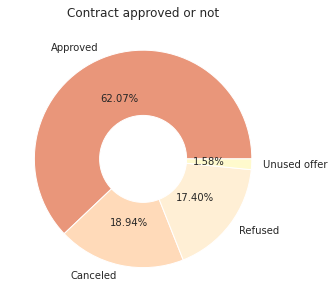

In [247]:
status_label = ['Approved','Canceled','Refused','Unused offer']
color = ['DarkSalmon','PeachPuff','PapayaWhip','LemonChiffon']
status_plot = plt.pie(status_pa['value'],labels=status_label,autopct='%1.2f%%',colors=color,data=pa)
circle = plt.Circle(xy=(0,0),radius=0.4,facecolor='white')
plt.gca().add_artist(circle)
plt.title('Contract approved or not')

plt.rcParams['figure.figsize']=(10,5)

plt.savefig('p-appreoved.pdf') 

* **Contract was approved or not in previous application :**
    * Approved : 62.07 % times
    * Cancelled : 18.94 % times
    * Refused : 17.40 % times
    * Unused offer : 1.58 % times

Next, we get contract was approved or not in previous application. About 62% applications was approved, about 19% applications was cancelled, and 17% applications was refused. Based on this data, we could say most of the applications will be approved. 

#### 2.1 Approved or not for different types

In [9]:
bb = pa.groupby(['NAME_CONTRACT_TYPE'])
bb['NAME_CONTRACT_STATUS'].value_counts()/(bb['NAME_CONTRACT_STATUS'].count())*100

NAME_CONTRACT_TYPE  NAME_CONTRACT_STATUS
Cash loans          Approved                41.808407
                    Canceled                35.929359
                    Refused                 22.196152
                    Unused offer             0.066082
Consumer loans      Approved                85.917732
                    Refused                 10.311307
                    Unused offer             3.557151
                    Canceled                 0.213810
Revolving loans     Approved                50.615539
                    Refused                 25.643495
                    Canceled                23.738378
                    Unused offer             0.002588
XNA                 Canceled                91.040462
                    Refused                  8.959538
Name: NAME_CONTRACT_STATUS, dtype: float64

Compared to current applicants, previous data shows that cash loans have highly refused rate, and cash loans have the lowest approved rate. 
Consumer loans has the highest approved rate and lowest refused rate. It is suggested that contract type is recategorized in the current application round comparing to previous applications.

#### 3. Reasons why the previous application was rejected

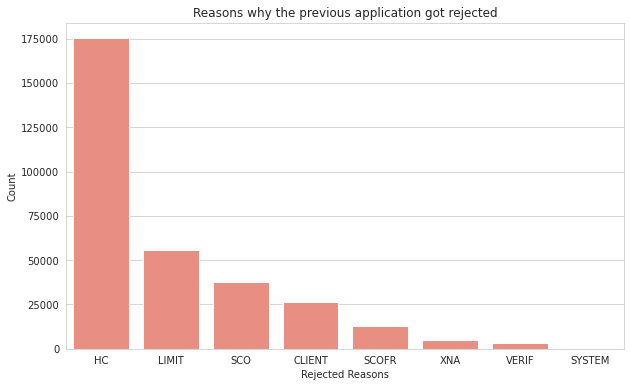

In [15]:
f, ax = plt.subplots(figsize=(10, 6))
reasons= sns.countplot(x='CODE_REJECT_REASON',data=pa,color='Salmon',order=pa['CODE_REJECT_REASON'].value_counts().iloc[1:].index)
ax.set(ylabel="Count",
       xlabel="Rejected Reasons",
      title= "Reasons why the previous application got rejected")

plt.show()

* **Reasons why the previous application gets rejected:**
    * HC: Hard Capture
    * LIMIT: Age Limit
    * SCO: Credit Score

Next, it would be useful to check why the previous applications had been rejected. Top reasons would be hard capture issued by financial institutes, not exceeding age limit, credit scores, etc. It should also be noted that the top 1 reason was denoted as XAP (not applicable). Thus, we drop the XAP group from the result table.

#### 4. What was the previous application for

In [46]:
temp = pa["NAME_PORTFOLIO"].value_counts()
temp

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

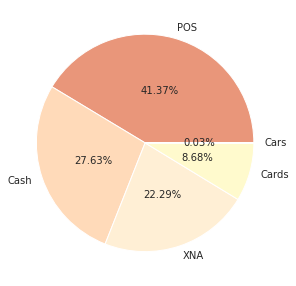

<Figure size 720x360 with 0 Axes>

In [246]:
pafor = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})
color = ['DarkSalmon','PeachPuff','PapayaWhip','LemonChiffon','Cornsilk']
plotprevious = plt.pie(pafor['values'],labels=pafor['labels'],autopct="%.2f%%", pctdistance=0.5,colors=color)

plt.show()
plt.rcParams['figure.figsize']=(10,5)
plt.savefig('p-pre_app.pdf') 

* **What was the previous application for:**
    * POS: 41.4%
    * Cash: 27.6%
    * XNA: 22.29%
    * Cards: 8.68%

In the application_train dataset, there are features related to whether the client owns a car or a house. We want to check if those features are related to the purposes of clients applying, thus influencing the predicted results of client's repaying ability. The top reasons the previous applications were considered for are point-of-sale financing, cash, and cards as debt consolidation. Also, it is worth to note that XNA stands for not applied reasons.

#### 5. Payment method that client choose to pay for the previous application

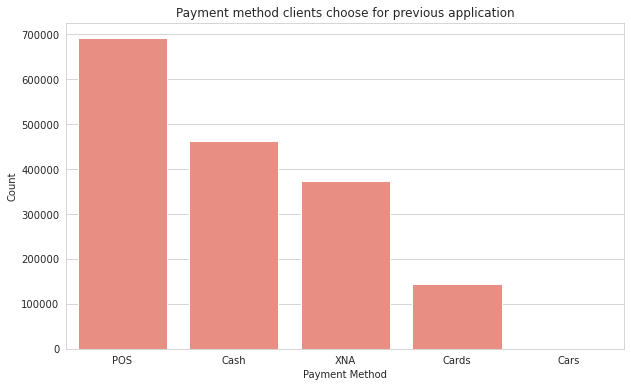

<Figure size 720x360 with 0 Axes>

In [250]:
payment = pa["NAME_PAYMENT_TYPE"].value_counts()
pm = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
f, ax = plt.subplots(figsize=(10, 6))
pmplot= sns.barplot(x=pm['labels'], y=pm['values'], data=pm,color='Salmon')
ax.set(ylabel="Count",
       xlabel="Payment Method",
      title= "Payment method clients choose for previous application")
plt.show()
plt.rcParams['figure.figsize']=(10,5)
plt.savefig('p-pre_payment.pdf') 

* **Payment methods :**
    * POS
    * Cash
    * Cards

It is interesting to see that the application puposes of clients and their payment methods highly resembled due to the fact that the recorded financial instruments are used at a fairly high rate in people's lives.

## IV. Data Preparation

### a. Preprocessing

In [6]:
# Number of each type of column 
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In the current application data frame, most of the categorical variables have a relatively small number of unique values. We will need to encoding these categorical variables.

In [8]:
# Preview of object type features
df.loc[:, df.dtypes == object].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [49]:
# one-hot encoding
df_dummified = pd.get_dummies(df,drop_first=True)
print('Data frame shape after encoding:', df_dummified.shape)

Data frame shape after encoding: (307511, 230)


In [50]:
# Joining Previous Application data to Application data:
# Number of previous applications per customer
grp = pa[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
app_prev = df_dummified.merge(grp, on =['SK_ID_CURR'], how = 'left')
app_prev['PREV_APP_COUNT'] = app_prev['PREV_APP_COUNT'].fillna(0)

# Combining numerical features
grp = pa.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
grp.columns = prev_columns
app_prev = app_prev.merge(grp, on =['SK_ID_CURR'], how = 'left')
app_prev.update(app_prev[grp.columns].fillna(0))

# Combining categorical features
prev_categorical = pd.get_dummies(pa.select_dtypes('object'),drop_first=True)
prev_categorical['SK_ID_CURR'] = pa['SK_ID_CURR']
grp = prev_categorical.groupby('SK_ID_CURR').mean().reset_index()
grp.columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns]
app_prev = app_prev.merge(grp, on=['SK_ID_CURR'], how='left')
app_prev.update(app_prev[grp.columns].fillna(0))

In [51]:
print('The shape of final prepared data is:',app_prev.shape)

The shape of final prepared data is: (307511, 377)


In [26]:
app_prev.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,PREV_PRODUCT_COMBINATION_Cash X-Sell: low,PREV_PRODUCT_COMBINATION_Cash X-Sell: middle,PREV_PRODUCT_COMBINATION_POS household with interest,PREV_PRODUCT_COMBINATION_POS household without interest,PREV_PRODUCT_COMBINATION_POS industry with interest,PREV_PRODUCT_COMBINATION_POS industry without interest,PREV_PRODUCT_COMBINATION_POS mobile with interest,PREV_PRODUCT_COMBINATION_POS mobile without interest,PREV_PRODUCT_COMBINATION_POS other with interest,PREV_PRODUCT_COMBINATION_POS others without interest
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.333333,0.0,0.333333,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0.222222,0.0,0.111111,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.000000,0.5,0.166667,0.0,0.000000,0.0,0.166667,0.0,0.0,0.0


In [52]:
app_prev = app_prev.apply(lambda x: x.fillna(x.median()),axis=0)

In [53]:
app_prev.isna().sum().sort_values(ascending=False).head(10)

PREV_PRODUCT_COMBINATION_POS others without interest    0
NAME_FAMILY_STATUS_Married                              0
NAME_INCOME_TYPE_Pensioner                              0
NAME_INCOME_TYPE_State servant                          0
NAME_INCOME_TYPE_Student                                0
NAME_INCOME_TYPE_Unemployed                             0
NAME_INCOME_TYPE_Working                                0
NAME_EDUCATION_TYPE_Higher education                    0
NAME_EDUCATION_TYPE_Incomplete higher                   0
NAME_EDUCATION_TYPE_Lower secondary                     0
dtype: int64

### b. Process Correlated Features

In [59]:
correlated_features = set()
correlation_matrix = app_prev.corr()

In [60]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print('There are',len(correlated_features),'features are highly correlated. These features will be dropped')

There are 59 features are highly correlated. These features will be dropped


In [61]:
correlated = list(correlated_features)
correlated_df = pd.DataFrame(correlated, columns=["correlated"]) 
correlated_df.to_csv('correlated.csv', index=False)

In [62]:
# remove the highly correlated variables
dftrain2 = app_prev.copy()
dftrain2 = app_prev.drop(correlated, axis = 1)

# remove ID column
dftrain2 = dftrain2.drop('SK_ID_CURR', axis = 1)

In [63]:
dftrain2.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PREV_PRODUCT_COMBINATION_Cash X-Sell: high,PREV_PRODUCT_COMBINATION_Cash X-Sell: low,PREV_PRODUCT_COMBINATION_Cash X-Sell: middle,PREV_PRODUCT_COMBINATION_POS household with interest,PREV_PRODUCT_COMBINATION_POS household without interest,PREV_PRODUCT_COMBINATION_POS industry with interest,PREV_PRODUCT_COMBINATION_POS industry without interest,PREV_PRODUCT_COMBINATION_POS mobile without interest,PREV_PRODUCT_COMBINATION_POS other with interest,PREV_PRODUCT_COMBINATION_POS others without interest
0,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0
1,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,...,0.000000,0.333333,0.0,0.333333,0.0,0.333333,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,...,0.111111,0.222222,0.0,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0
4,0,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,...,0.000000,0.000000,0.5,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0


After removing the features with high correlation, we have 317 columns left.

In [64]:
# feature matrix
X = dftrain2.drop('TARGET',axis=1)
X.shape

(307511, 316)

In [65]:
# target vector
y = dftrain2['TARGET']
y.shape

(307511,)

### c. Split the data into train and test with a 70-30 split

In [66]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y, random_state=780)


In [67]:
from sklearn.linear_model import LogisticRegression  # 1. choose model class
model = LogisticRegression(solver='liblinear')       # 2. instantiate model

### d. Fit the Model

In [68]:
model.fit(Xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [69]:
# Logistic regrssion model
y_model = model.predict(Xtest)
y_model

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
# Logistic regrssion sensitivity
TP = sum((ytest == 1) & (y_model == 1))
TP

0

In [71]:
P = sum(ytest==1)
P

7448

In [72]:
TPR=TP/P
TPR

0.0

In [73]:
# Logistic regrssion specificity
N = sum(ytest==0)
N

84806

In [74]:
TN = sum((ytest == 0) & (y_model == 0))
TN

84806

In [76]:
TNR = TN/N
TNR

1.0

#### Summary for logistic regression:
  - Sensitivity (TPR): 0%
  - Specificity (TNR): 100%

#### Gaussian Naive Bayes

In [78]:
# Gaussian Naive Bayes:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [79]:
# GaussianNB sensitivity
TP = sum((ytest == 1) & (y_model == 1))
P = sum(ytest==1)
TPR=TP/P
TPR

0.6593716433941997

In [80]:
# GaussianNB specificity
N = sum(ytest==0)
TN = sum((ytest == 0) & (y_model == 0))
TNR = TN/N
TNR

0.5126288234323043

#### Random Forest

In [84]:
# Random Forest model:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)

In [85]:
# Random Forest sensitivity
TP = sum((ytest == 1) & (y_model == 1))
P = sum(ytest==1)
TPR=TP/P
TPR

0.0005370569280343716

In [86]:
# Random Forest specificity
N = sum(ytest==0)
TN = sum((ytest == 0) & (y_model == 0))
TNR = TN/N
TNR

0.9999764167629649

#### Gradient Boost

In [87]:
# Gradient Boost model:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)

In [88]:
# Gradient Boost sensitivity
TP = sum((ytest == 1) & (y_model == 1))
P = sum(ytest==1)
TPR=TP/P
TPR

0.016917293233082706

In [89]:
# Gradient Boost specificity
N = sum(ytest==0)
TN = sum((ytest == 0) & (y_model == 0))
TNR = TN/N
TNR

0.99898592080749

### Summary for all models:
Logistic Regression:
  - Sensitivity (TPR): 0%
  - Specificity (TNR): 100%

GaussianNB:
  - Sensitivity (TPR): 65.94%
  - Specificity (TNR): 51.26%

Random Forest:
  - Sensitivity (TPR): 0.053%
  - Specificity (TNR): 99.99%

Gradient Boost:
  - Sensitivity (TPR): 1.69%
  - Specificity (TNR): 99.89%


Based on the results from the models, we would recommend Gaussian Naive Bays as the best model. Gaussian Naive Bays has TRP more than 2/3 which is among the highest of the models. As for TNR, it has more than half accurrate rate as well. Random Forest and Grandient Boost have too low TPR. 

### V. Challenges

1. A lot of missing values 

 Solution: Imputed as median
 
 Output: app_prev=app_prev.apply(lambda x: x.fillna(x.median()),axis=0)

2. Imbalanced target

 Our distribution of target values are highly imbalanced. Only 8.1% applications were marked as 1. We can’t use accuracy as a error metric. 
 
 Solution: use F1-score instead of accuracy as error metric

3. Typo

 ‘DAYS_EMPLOYED’ column has typo (1000 years). It effects the result plot of this data is very strange.
 
 Solution: replace with nan
 
 Output: 36523 → nan

## VI. Conclusion

Comparing to the previous rounds of applications, applicants’ motives changed.

Clients in the current pool of applications have a fairly low number in repayment difficulties.

Clients with a mature age level, high education level, sufficient work experience and a stable living area status would have stronger ability to repay their loans.

The current status review mechanism is efficient enough to rule out the applicants who are not qualified for the loan.
